In [1]:
#**Projet campagnes marketing **: Dans ce projet, vous allez travailler avec l'équipe de marketing d'un supermarché.
#Ils souhaitent avoir un analyse de clients basé sur les données recoltées des dernières campagnes de marketing.
#Vous disposez du dataset "marketing_campaign.csv".
#Temps estimé : 2 jours.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [3]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
pd.set_option('display.max_columns', None)
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
mean_Income = df["Income"].mean()
mean_Income

52247.25135379061

In [8]:
df.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [9]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [10]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [11]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [12]:
df["Age"]= 2024 - df["Year_Birth"]
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,57
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,53
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,39
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,50
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,74


In [13]:
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [14]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43,422
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,57,716
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,53,590
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,39,169
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,50,46
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,74,49


In [15]:
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [16]:
df["Living_With"] = df["Living_With"].replace({"Alone": 1, "Partner":2})

In [17]:
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [18]:
df["Family_Size"] = df["Living_With"] + df["Children"]

In [19]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
# Check data type after converting
print('Dt_Customer type: ',df["Dt_Customer"].dtype)

Dt_Customer type:  datetime64[ns]


In [20]:
# Create 'Seniority'(in weeks) feature. 
last_date =  df['Dt_Customer'].max()
df['Seniority'] = (last_date -df['Dt_Customer']).dt.days/30

# Take a look to make sure calculation is correct
df[['Dt_Customer','Seniority' ]].head(2)

# 'Dt_Customer' is now redundant. Remove
df.drop(['Dt_Customer'], axis=1, inplace=True)

In [21]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Seniority
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67,1617,1,0,1,22.100000
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70,27,1,2,3,3.766667
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59,776,2,0,2,10.400000
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40,53,2,1,3,4.633333
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43,422,2,1,3,5.366667
5,7446,1967,Master,Together,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,57,716,2,1,3,9.766667
6,965,1971,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,53,590,1,1,2,19.766667
7,6177,1985,PhD,Married,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,39,169,2,1,3,13.900000
8,4855,1974,PhD,Together,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,50,46,2,1,3,12.933333
9,5899,1950,PhD,Together,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,74,49,2,2,4,3.600000


In [22]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

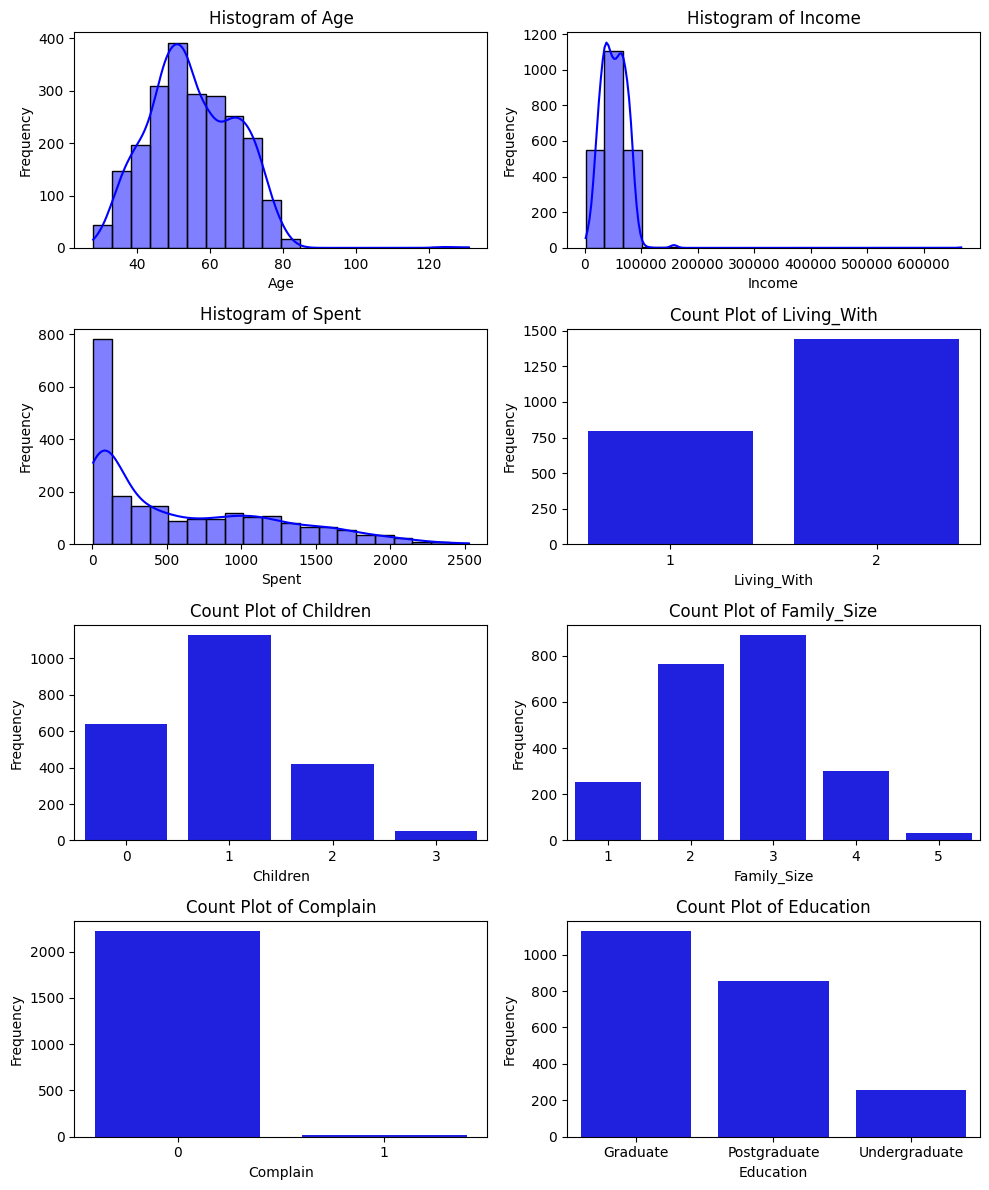

In [23]:
continuous_columns = ['Age', 'Income', 'Spent']
categorical_columns = ['Living_With', 'Children', 'Family_Size', 'Complain', 'Education']
all_columns = continuous_columns + categorical_columns

num_rows = (len(all_columns) + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, num_rows * 3))
axes = axes.flatten() 

for i, col in enumerate(all_columns):
    if col in continuous_columns:
        sns.histplot(data=df, x=col, bins=20, ax=axes[i], kde=True, color='blue') 
        axes[i].set_title(f'Histogram of {col}')
    elif col in categorical_columns:
        sns.countplot(data=df, x=col, ax=axes[i], color='blue')
        axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

if len(all_columns) % 2 != 0:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

In [24]:
mask = ( df['Income'] <= 600000) & (df['Age'] <= 100) 
df = df[mask]

df.shape

(2212, 34)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Recency              2212 non-null   int64  
 8   MntWines             2212 non-null   int64  
 9   MntFruits            2212 non-null   int64  
 10  MntMeatProducts      2212 non-null   int64  
 11  MntFishProducts      2212 non-null   int64  
 12  MntSweetProducts     2212 non-null   int64  
 13  MntGoldProds         2212 non-null   int64  
 14  NumDealsPurchases    2212 non-null   int64  
 15  NumWebPurchases      2212 non-null   i

In [26]:
df.describe()qecezac'""'()'

SyntaxError: unterminated string literal (detected at line 1) (3646212114.py, line 1)

In [ ]:
df.head()

In [27]:
to_drop = ["Marital_Status", "Z_CostContact", "Z_Revenue", "ID", "Year_Birth"]
df = df.drop(to_drop, axis=1)

In [ ]:
df.head()

In [ ]:
df.info()

In [28]:
education_mapping = {
    "Undergraduate": 0,
    "Graduate": 1,
    "Postgraduate": 2
}

# Apply the mapping to the 'Education' column
df['Education'] = df['Education'].map(education_mapping)

In [29]:
df["Education"].value_counts()

1    1115
2     845
0     252
Name: Education, dtype: int64

In [30]:
df["Living_With"].value_counts()

2    1428
1     784
Name: Living_With, dtype: int64

In [ ]:
df.shape

In [ ]:
sdccd ::"';é"'"

In [ ]:
df.head()

In [ ]:
df.columns

In [31]:
to_drop = ['Kidhome', 'Teenhome', 'Recency','Complain', 'Response','Living_With','Seniority']
df = df.drop(to_drop, axis=1)

In [34]:
df.head()

,Education,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Spent,Children,Family_Size
0,1,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,67,1617,0,1
1,1,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,70,27,2,3
2,1,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,59,776,0,2
3,1,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,40,53,1,3
4,2,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,43,422,1,3


In [ ]:
ds.head()

In [32]:
df.columns

Index(['Education', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Age',
       'Spent', 'Children', 'Family_Size'],
      dtype='object')

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Faites une copie de votre DataFrame
ds = df.copy()

# Supprimez les colonnes spécifiées
cols_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']
ds = ds.drop(cols_del, axis=1)

# Standardisez les données
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)

# Initialisez et ajustez le modèle K-means
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_ds)

# Obtenez les étiquettes de cluster pour chaque point de données
cluster_labels = kmeans.labels_

# Ajoutez les étiquettes de cluster au DataFrame original
df['Cluster'] = cluster_labels

# Affichez les clusters formés
print(df['Cluster'].value_counts())

# Affichez les centroïdes de chaque cluster
print(kmeans.cluster_centers_)


/home/jsles/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1    661
0    562
2    547
3    442
Name: Cluster, dtype: int64
[[ 0.23317785  0.35986623  0.60795024 -0.0414765  -0.06230643 -0.08905265
  -0.02945996  0.42700486  0.6858033   0.93554873  0.22992178  0.70389303
   0.14774414  0.30319847  0.34098102  0.18397321  0.18001512]
 [-0.30016224 -0.95490345 -0.79503861 -0.49483734 -0.63569192 -0.50317019
  -0.49625397 -0.50786345 -0.29607848 -0.69986084 -0.72175303 -0.7973911
   0.53809031 -0.56912852 -0.83752446 -0.19046883 -0.18878002]
 [-0.05233335  1.1293402   0.88735422  1.10193868  1.33594568  1.17659399
   1.08792567  0.6331064  -0.54781024  0.3572724   1.16757004  0.79524693
  -1.07035033  0.03715517  1.30220626 -1.02793473 -0.90282873]
 [ 0.21716657 -0.42715551 -0.68219519 -0.57095744 -0.62342468 -0.59039327
  -0.56677595 -0.56694161  0.24872992 -0.5850642  -0.65791426 -0.68667972
   0.33206273  0.41962112 -0.79261196  1.32304806  1.17072943]]


In [ ]:
ds.head()

In [ ]:
scaled_ds.head()

In [ ]:
df.head()

In [ ]:
ds = df.copy()
cols_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']
ds = ds.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)

In [ ]:
ds = df.copy()
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)
print("All features are now scaled")

In [ ]:
scaled_ds.head()

In [ ]:
df["Cluster"].value_counts()

In [ ]:
scaled_ds.info()

In [ ]:
df.head()

In [ ]:
scaled_ds = scaled_ds.dropna()

In [ ]:
from sklearn.cluster import KMeans

# Nombre de clusters que vous voulez former
num_clusters = 4

# Initialisation du modèle K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Adapter le modèle aux données mises à l'échelle
kmeans.fit(scaled_ds)

# Obtenir les étiquettes de cluster pour chaque point de données
cluster_labels = kmeans.labels_

# Ajouter les étiquettes de cluster à votre DataFrame d'origine
ds['Cluster'] = cluster_labels

# Afficher les clusters formés
print(ds['Cluster'].value_counts())

# Vous pouvez également afficher les centroides de chaque cluster
print(kmeans.cluster_centers_)


Score de silhouette moyen : 0.16366284900974404


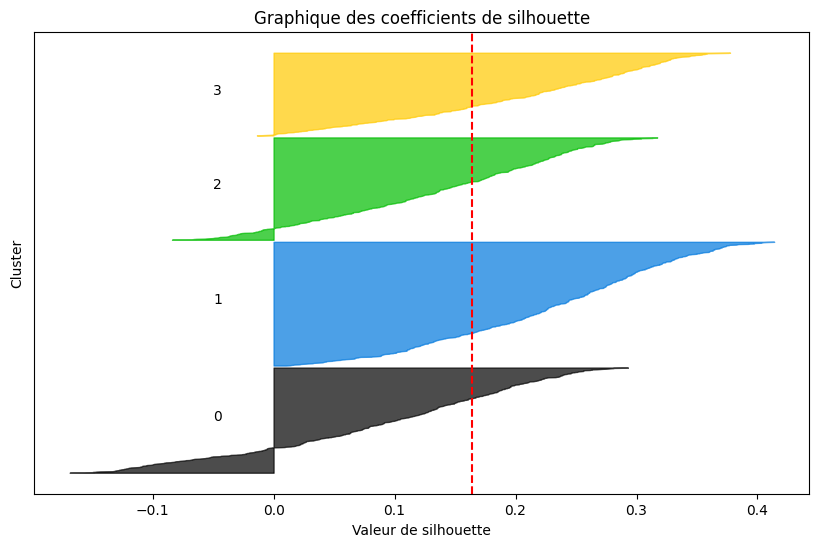

In [36]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# Calculer le score de silhouette
silhouette_avg = silhouette_score(scaled_ds, cluster_labels)
print("Score de silhouette moyen :", silhouette_avg)

# Calculer les valeurs de silhouette pour chaque échantillon
sample_silhouette_values = silhouette_samples(scaled_ds, cluster_labels)

# Tracer le graphique des coefficients de silhouette
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(num_clusters):
    # Regrouper les valeurs de silhouette pour les points de données du cluster i
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    # Trier les valeurs de silhouette pour chaque cluster
    ith_cluster_silhouette_values.sort()

    # Calculer la taille du cluster
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Choisir une couleur pour représenter le cluster
    color = cm.nipy_spectral(float(i) / num_clusters)

    # Tracer les valeurs de silhouette pour le cluster i
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiqueter le cluster i au milieu des valeurs de silhouette calculées
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Mettre à jour y_lower pour le prochain cluster
    y_lower = y_upper + 10  # 10 pour les espaces blancs

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])  # Effacer les étiquettes y
plt.ylabel("Cluster")
plt.xlabel("Valeur de silhouette")
plt.title("Graphique des coefficients de silhouette")
plt.show()


In [ ]:
scaled_ds

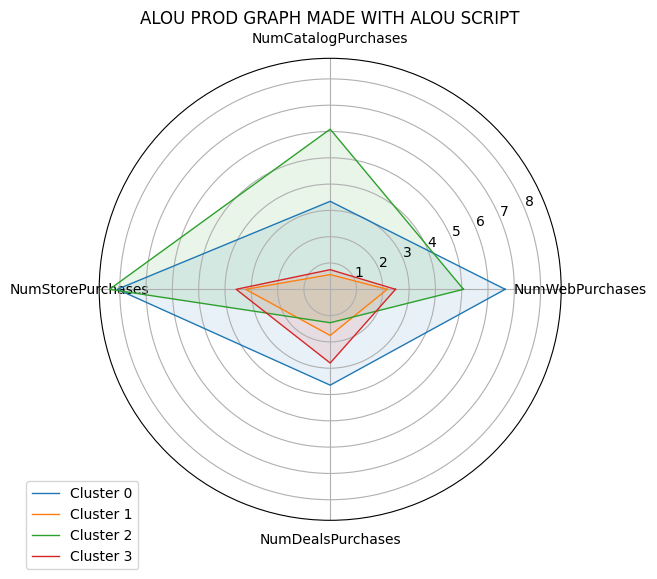

In [37]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from math import pi
df['Cluster'] = cluster_labels

# Calculer les moyennes des clusters pour les attributs spécifiés
attributes = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
cluster_means = df.groupby('Cluster')[attributes].mean().reset_index()

# Nombre de variables
num_vars = len(attributes)

# Calculer les angles pour le radar chart
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1] 

# Créer le radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1] 
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Cluster"])}')
    ax.fill(angles, values, alpha=0.1)

# Ajouter les labels des axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('ALOU PROD GRAPH MADE WITH ALOU SCRIPT')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

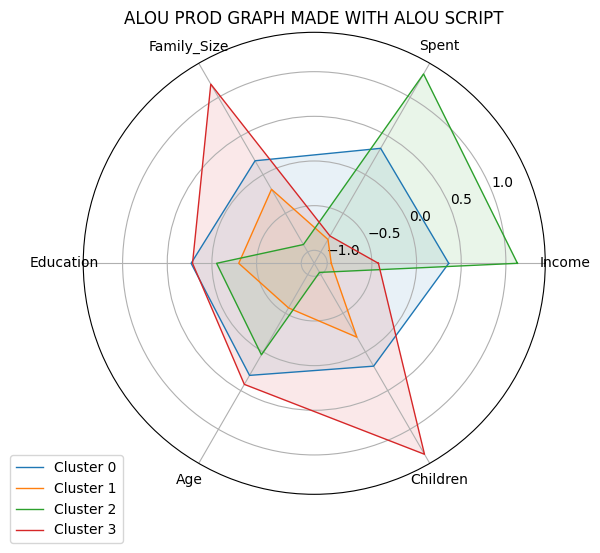

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from math import pi
scaled_ds['Clusters'] = cluster_labels

# Calculer les moyennes des clusters pour les attributs spécifiés
attributes = ['Income', 'Spent', 'Family_Size', 'Education', 'Age', 'Children']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

# Nombre de variables
num_vars = len(attributes)

# Calculer les angles pour le radar chart
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1] 

# Créer le radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1] 
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Ajouter les labels des axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('ALOU PROD GRAPH MADE WITH ALOU SCRIPT')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

In [ ]:
df.head()

In [ ]:
ds.head()

In [ ]:
scaled_ds.head()

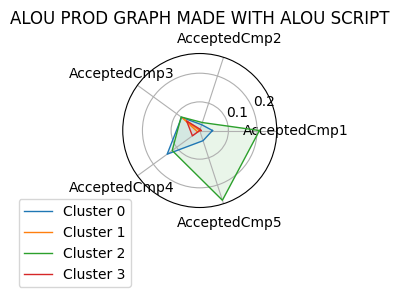

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from math import pi
ds['Cluster'] = cluster_labels

# Calculer les moyennes des clusters pour les attributs spécifiés
attributes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cluster_means = df.groupby('Cluster')[attributes].mean().reset_index()

# Nombre de variables
num_vars = len(attributes)

# Calculer les angles pour le radar chart
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1] 

# Créer le radar chart
fig, ax = plt.subplots(figsize=(2, 2), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1] 
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Cluster"])}')
    ax.fill(angles, values, alpha=0.1)

# Ajouter les labels des axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('ALOU PROD GRAPH MADE WITH ALOU SCRIPT')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

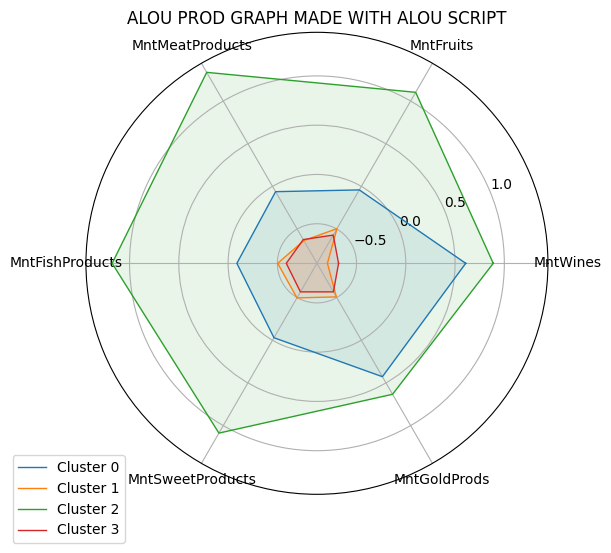

In [40]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from math import pi
scaled_ds['Clusters'] = cluster_labels

# Calculer les moyennes des clusters pour les attributs spécifiés
attributes = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

# Nombre de variables
num_vars = len(attributes)

# Calculer les angles pour le radar chart
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1] 

# Créer le radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1] 
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Ajouter les labels des axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('ALOU PROD GRAPH MADE WITH ALOU SCRIPT')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

In [ ]:
df.head(20)

In [ ]:
zefzfe )=zefezf ezfz

In [ ]:
df.head()

In [ ]:
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)
print("All features are now scaled")

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_labels = agg_clustering.fit_predict(scaled_ds)

# Ajouter les étiquettes de cluster au dataframe original
ds['Cluster'] = cluster_labels

# Visualisation des résultats
plt.figure(figsize=(10, 7))
plt.title("Dendrogramme")
dendrogram = sch.dendrogram(sch.linkage(scaled_ds, method='ward'))
plt.show()

# Afficher les premiers enregistrements avec les étiquettes de cluster
print(ds.head())

In [ ]:
scaled_ds.head()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Récupérer les composantes principales
PC1 = pca.components_[0]
PC2 = pca.components_[1]
PC3 = pca.components_[2]

# Récupérer les noms des variables
variables_names = scaled_ds.columns

# Créer une figure 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Tracer les points avec les charges factorielles comme étiquettes
ax.scatter(PC1, PC2, PC3)

# Ajouter les noms des variables comme étiquettes
for i, (x, y, z) in enumerate(zip(PC1, PC2, PC3)):
    ax.text(x, y, z, variables_names[i], fontsize=9)

# Ajouter une grille pour une meilleure visualisation
ax.grid(True)

# Ajouter les axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Afficher le graphique
plt.title("Cercle des Corrélations pour PCA")
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Récupérer les composantes principales
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]  # Ajout de la troisième dimension

# Créer une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les points en 3D
ax.scatter(x, y, z, c="maroon", marker="o")

# Titre et étiquettes des axes
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Afficher le graphique
plt.show()


In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
# Initiating the KMeans Clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
# Fit model and predict clusters
cluster_labels = kmeans.fit_predict(PCA_ds)  # Changed variable name from yhat_kmeans to cluster_labels
PCA_ds["Clusters"] = cluster_labels
# Adding the Clusters feature to the original dataframe.
df["Clusters"] = cluster_labels
scaled_ds["Clusters"] = cluster_labels

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract columns for the plot
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']  # Ajout de la troisième dimension
# Get unique clusters
clusters = PCA_ds['Clusters'].unique()

# Color map for clusters
colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))

# Create a new figure for the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for cluster, color in zip(clusters, colors):
    ix = PCA_ds['Clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)

ax.set_title('3D Scatter Plot of PCA Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Clusters',y="" data=df)
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Income', y='Spent', hue='Clusters', data=df, palette='viridis', s=20)

plt.title('Scatter Plot of Income vs. Spent by Cluster')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend(title='Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Income', y='Age', hue='Clusters', data=df, palette='viridis', s=20)

plt.title('Scatter Plot of Income vs. Spent by Cluster')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend(title='Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Income', y='MntWines', hue='Clusters', data=df, palette='viridis', s=20)

plt.title('Scatter Plot of Income vs. Spent by Cluster')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend(title='Cluster')
plt.show()

In [ ]:
df.columns

In [ ]:
from math import pi

attributes = ['Income', 'Spent', 'Family_Size', 'Education', 'Age','Seniority']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1] 
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Average Income, Spent, Family Size, and Education by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

In [ ]:
attributes = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Radar Chart: Average Spending with Wines, Fruits, Meat, Fish, Sweets, and Gold by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

In [ ]:
attributes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cluster_means = df.groupby('Clusters')[attributes].sum().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1] 

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Radar Chart: Total Accpeted Promotions by Campaing for each Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

In [ ]:
attributes = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1] 

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1] 
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Average Income, Spent, Family Size, and Education by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

Cluster 0 : Jeune moyen 45 ans probablement certain mauvaise éducation scolaire donc income faible et depense tres faible aussi avec un family size moyen les produits acheté sont tous tres faible leger achats coté poisson sweet et gold aucune campagne na été determinante pour ce groupe sauf la 3eme et utilise le web pour la plus part aevc des réductions.

Cluster 3 : Souvent des célibataires age moyen 55 ans sans trop de famille a charge un bon niveau d'éducation et donc des incomes plutot élévé et aussi donc des dépenses qui suivent les incomes coté produit on se fait plaisir achat de tout type proposé par le magasin les campagnes les plus pertinentes on été la 1 et la 5 et les achats se font surtout en magasin et par catalog mais web aussi.

Cluster 2 : Cluster le plus agé en moyenne 60 ans cluster assez moyen avec un bon niveau d'éducation mais de la famille a charge  income moyen du a la retraite j'imagine ainsi qu'achat moyen achat moyen du coté fruits fish meat sweet mais beaucoup de dépense dans le vin et le gold séduit par la campagne 4 et 3 un max de bon de réductions et typologie d'achat assez moyen sur les 3 web cat log et store.

Cluster 1 : Cluster moyen avec une moyenne d'age de 55 ans des personnes dasn la vie active avec une famille a charge un bon niveau d'éducation et donc de plutot bon income et une dépense moyenne dans toutes catégorie de produit mais quand meme un leger pic du coté vin on connait les darons y aiment se faire plaisirs campagne 3/4 a été les plus impactante


campagne 2 aucun impact a ne pas reproduire dans un soucis de recherche de profit campagne 1 et 5 a privilégié dans un soucis de recherche de client et de fidélisation campagne 4 et 3 a étudier et a travailler les achats sont plus représenté par store et catalog mais le web marche bien pour notre ensemble le plus grand cluster 1 donc a travailler

In [43]:
df.loc[:, ["NumWebPurchases", "Income", 'Age',"Cluster"]].groupby('Cluster').describe(include='all').loc[:,(slice(None),['mean', '25%', '50%', '75%'])].style.background_gradient(cmap='Greys')

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X, y = make_blobs(random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
silhouette_score(X, kmeans.fit_predict(X))

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()